In [48]:
# Imports
from fredapi import Fred
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
import time
load_dotenv()
API_KEY = os.getenv('API_KEY')
fred = Fred(API_KEY)

# Retrieving the data

<Axes: >

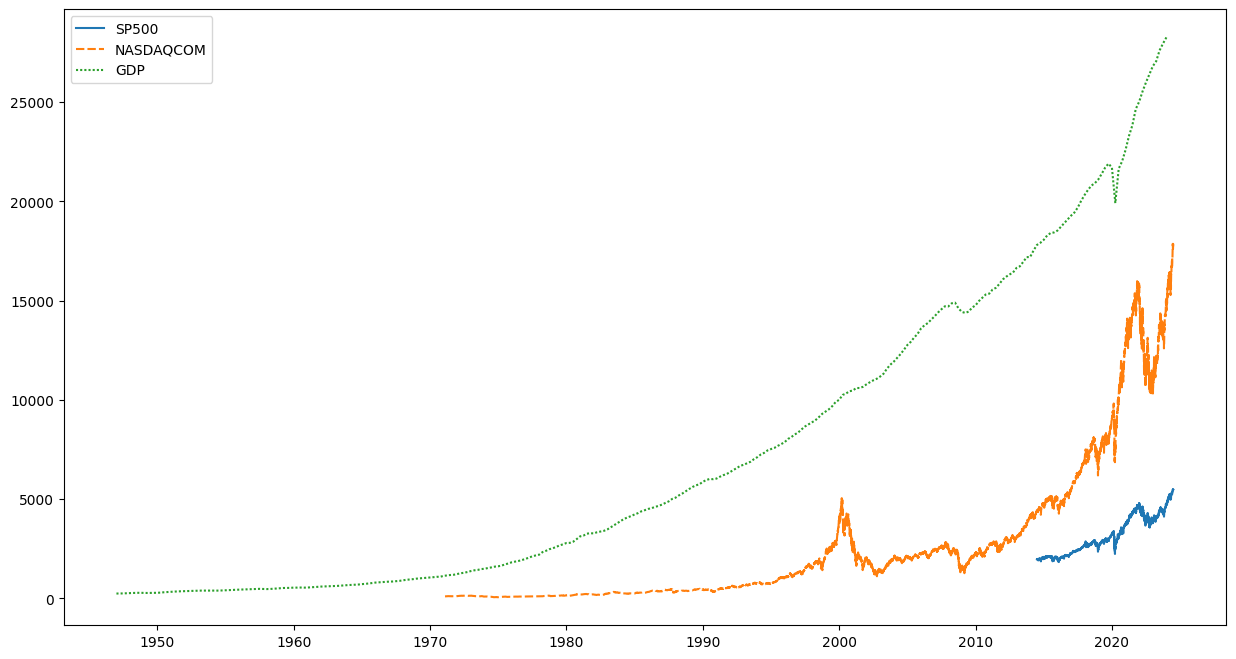

In [133]:
sp500 =  pd.Series(fred.get_series("SP500"), name="SP500")
nasdaqcom = pd.Series(fred.get_series("NASDAQCOM"), name="NASDAQCOM")
gdp = pd.Series(fred.get_series("GDP"), name="GDP")
df = pd.DataFrame({sp500.name: sp500, nasdaqcom.name: nasdaqcom, gdp.name: gdp})
plt.figure(figsize=(15,8))
sns.lineplot(df)

In [145]:
# Getting the unemployment rate
unrate = fred.search("unemployment state")
unrate_filter = (unrate['seasonal_adjustment_short'] == "SA") & (unrate['frequency'] == 'Monthly') & (unrate['units'] == "Percent") & (unrate['title'].str.startswith("Unemployment Rate in"))
unrate = unrate[unrate_filter]

unrateSeries = []
for seriesId in unrate.index:
    unrateSeries.append(pd.Series(fred.get_series(seriesId), name=seriesId))
    time.sleep(0.2) # Senza veniva bloccata l' api
unrateSeries.append(pd.Series(fred.get_series("SLUEM1524ZSUSA"), name="SLUEM1524ZSUSA"))
dfUnrate = pd.concat(unrateSeries, axis=1)


,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,...,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR,SLUEM1524ZSUSA
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6,NaN
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,...,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6,NaN
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,...,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6,NaN
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,...,4.0,8.1,8.6,3.1,6.7,6.8,9.5,8.5,9.4,NaN
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,...,3.9,8.3,8.5,3.1,6.6,6.7,9.5,8.5,9.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,4.7,...,2.8,4.1,2.3,2.1,3.6,3.4,4.0,4.6,3.4,NaN
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,4.8,...,2.8,4.0,2.3,2.1,3.6,3.4,4.0,4.6,3.4,NaN
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,4.8,...,2.8,3.9,2.2,2.1,3.6,3.4,3.9,4.6,3.3,NaN
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,4.8,...,2.8,3.9,2.1,2.0,3.6,3.5,3.9,4.6,3.3,NaN


In [149]:
dfUnrate[dfUnrate["SLUEM1524ZSUSA"].notna()]

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,...,WYUR,DEUR,VTUR,SDUR,CMWRUR,CSOUUR,CNERUR,CWSTUR,CNEWUR,SLUEM1524ZSUSA
1991-01-01,7.1,6.8,6.4,7.0,6.5,6.4,8.8,7.2,8.1,6.5,...,5.1,6.5,5.7,3.6,6.3,6.5,6.6,6.4,7.2,13.418
1992-01-01,8.6,7.5,8.2,8.3,7.4,6.9,9.5,7.5,9.0,8.4,...,5.4,5.4,6.2,3.4,6.7,7.1,7.9,7.7,8.2,14.234
1993-01-01,9.8,7.6,8.4,7.9,7.2,7.2,7.6,7.5,8.2,7.5,...,5.2,4.8,6.0,3.6,6.3,6.9,7.9,8.4,7.6,13.369
1994-01-01,9.3,7.0,7.6,7.0,6.7,6.4,7.2,6.7,6.6,6.6,...,5.3,5.2,4.5,3.4,5.7,6.3,7.0,7.7,6.2,12.507
1995-01-01,7.8,5.9,6.2,5.7,5.7,4.5,5.2,5.9,5.7,5.1,...,4.5,4.0,4.2,3.1,4.5,5.3,5.9,6.5,5.4,12.149
1996-01-01,7.8,6.1,6.3,5.5,5.9,5.1,4.9,5.5,5.0,5.3,...,4.9,4.9,4.1,3.3,4.5,5.4,5.9,6.6,5.0,12.050
1997-01-01,6.9,5.7,6.5,5.2,5.3,5.1,4.7,5.1,4.4,5.1,...,5.2,4.9,4.4,3.1,4.4,5.2,5.6,6.1,4.7,11.404
1998-01-01,6.0,4.9,6.0,4.7,4.8,4.4,4.0,4.5,3.6,4.7,...,4.6,3.4,3.6,2.9,3.9,4.5,5.0,5.3,3.8,10.403
1999-01-01,5.6,4.7,5.3,4.1,4.5,4.3,4.0,4.6,3.3,4.2,...,4.9,3.2,3.2,2.8,3.6,4.2,4.4,5.1,3.2,9.887
2000-01-01,5.0,4.7,4.7,3.7,4.2,4.2,3.3,4.7,3.1,4.3,...,4.0,3.4,2.8,2.5,3.5,4.0,4.0,4.6,3.0,9.275


<Axes: >

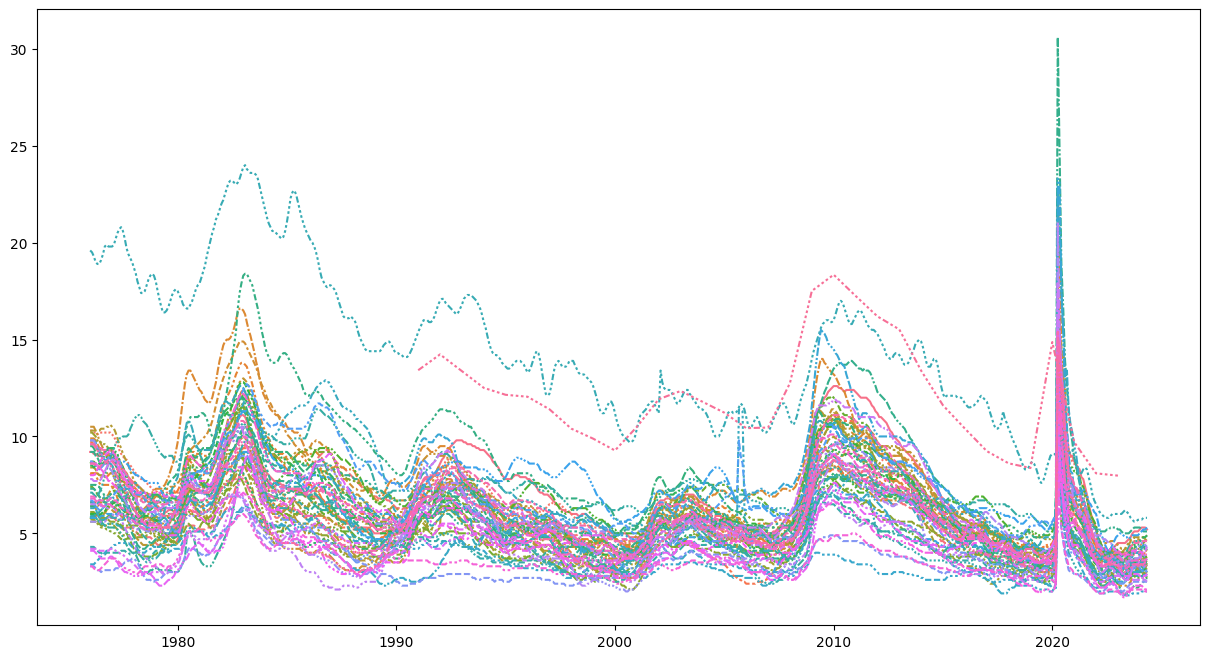

In [141]:
plt.figure(figsize=(15,8))
sns.lineplot(dfUnrate, legend=False)

Text(0, 0.5, 'Tasso di disoccupazione')

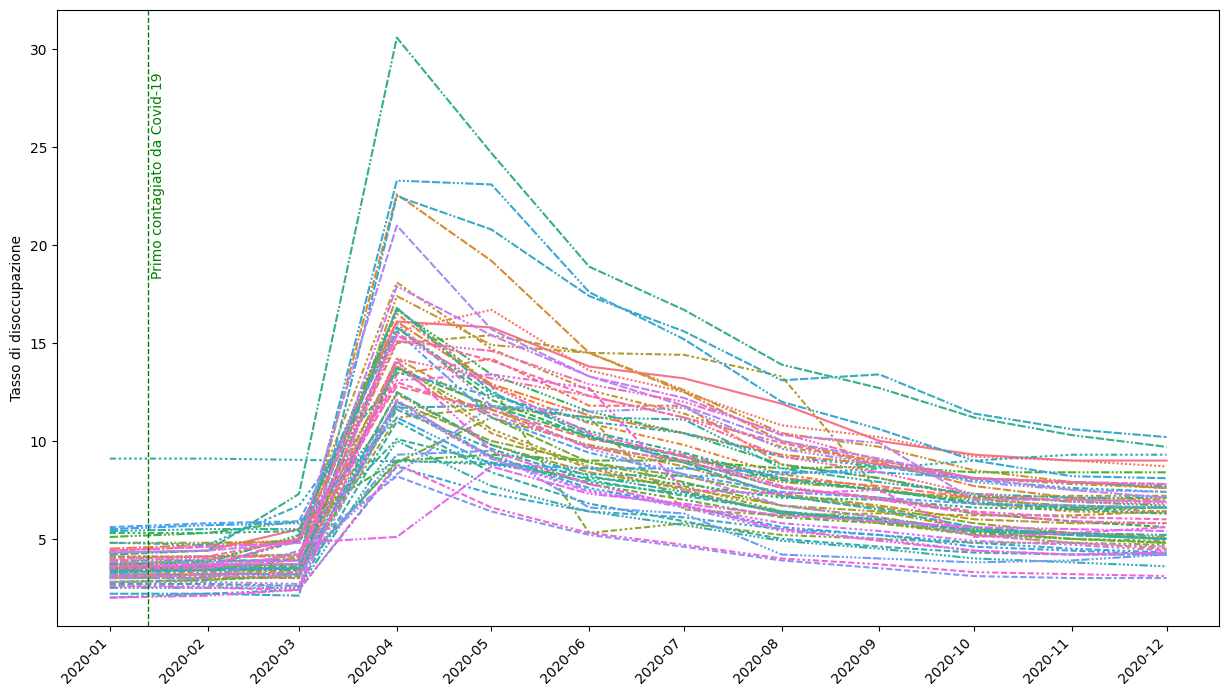

In [144]:
dfUnrate2020 = dfUnrate[(dfUnrate.index >= "2020-01-01") & (dfUnrate.index <= "2020-12-31")]
dfIndex2020 = df[(df.index >= "2020-01-01") & (df.index <= "2020-12-31")][['SP500', 'NASDAQCOM']]
plt.figure(figsize=(15,8))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(dfUnrate.index, rotation=45, ha='right')
sns.lineplot(dfUnrate2020, legend=False)
plt.axvline(x=pd.to_datetime("2020-01-13"), color='g', linestyle='--', linewidth=1)
plt.text(pd.to_datetime("2020-01-14"), plt.ylim()[1]*0.9, 'Primo contagiato da Covid-19', color='green', rotation=90, verticalalignment='top')
plt.ylabel("Tasso di disoccupazione")



# Importing Covid Cases Per State

<Axes: xlabel='date_updated', ylabel='tot_cases'>

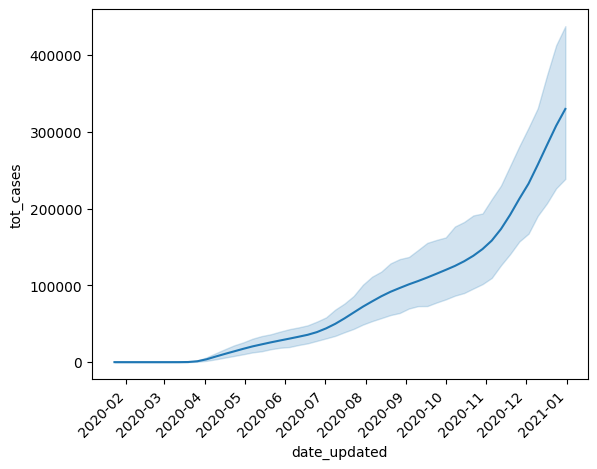

In [138]:
# Importing covid cases per state

covidCasesDf = pd.read_csv("data/covid_per_state.csv")
covidCasesDf['date_updated'] = pd.to_datetime(covidCasesDf['date_updated'])
covidCasesDf['start_date'] = pd.to_datetime(covidCasesDf['start_date'])
covidCasesDf['end_date'] = pd.to_datetime(covidCasesDf['end_date'])

covid2020Filter = (covidCasesDf['date_updated'] >= "2020-01-01") & (covidCasesDf['date_updated'] <= "2020-12-31")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(dfUnrate.index, rotation=45, ha='right')
sns.lineplot(covidCasesDf[covid2020Filter], x='date_updated', y='tot_cases')


In [153]:
fred.search("inflation", filter=("frequency", "Monthly"))

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1210-01-01, at position 0